# Install and Import Packages

In [1]:
%pip install jupysql --upgrade duckdb-engine pandas plotly seaborn matplotlib ipywidgets --quiet

Note: you may need to restart the kernel to use updated packages.


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from sql.ggplot import ggplot, aes, geom_boxplot, geom_histogram, facet_wrap
import ipywidgets as widgets
from ipywidgets import interact

In [3]:
# Loading in SQL extension
%reload_ext sql
# Initiating a DuckDB database named 'car_data.duckdb' to run SQL queries
%sql duckdb:///../data/database/car_data.duckdb

# Exploring the Data

In [4]:
%sql select * from fuel

Running query in 'duckdb:///../data/database/car_data.duckdb'

model_year,make_,model,vehicleclass_,enginesize_l,cylinders_,transmission_,fuel_type,fuelconsumption_city_l_100km,fuelconsumption_hwy_l_100km,fuelconsumption_comb_l_100km,fuelconsumption_comb_mpg,co2emissions_g_km,co2_rating,smog_rating,transmission_type,number_of_gears,mapped_fuel_type,type_of_wheel_drive,id,vehicle_type
2023,acura,integra,full-size,1.5,4.0,AV7,Z,7.9,6.3,7.2,39,167,6,7,continuously variable,7,premium gasoline,unspecified,1,fuel-only
2023,acura,integra a-spec,full-size,1.5,4.0,AV7,Z,8.1,6.5,7.4,38,172,6,7,continuously variable,7,premium gasoline,unspecified,2,fuel-only
2023,acura,integra a-spec,full-size,1.5,4.0,M6,Z,8.9,6.5,7.8,36,181,6,6,manual,6,premium gasoline,unspecified,3,fuel-only
2023,acura,mdx sh-awd,suv - small,3.5,6.0,AS10,Z,12.6,9.4,11.2,25,263,4,5,automatic with select Shift,10,premium gasoline,All-wheel drive,4,fuel-only
2023,acura,mdx sh-awd type s,suv - standard,3.0,6.0,AS10,Z,13.8,11.2,12.4,23,291,4,5,automatic with select Shift,10,premium gasoline,All-wheel drive,5,fuel-only
2023,acura,rdx sh-awd,suv - small,2.0,4.0,AS10,Z,11.0,8.6,9.9,29,232,5,6,automatic with select Shift,10,premium gasoline,All-wheel drive,6,fuel-only
2023,acura,rdx sh-awd a-spec,suv - small,2.0,4.0,AS10,Z,11.3,9.1,10.3,27,242,5,6,automatic with select Shift,10,premium gasoline,All-wheel drive,7,fuel-only
2023,acura,tlx sh-awd,compact,2.0,4.0,AS10,Z,11.2,8.0,9.8,29,230,5,7,automatic with select Shift,10,premium gasoline,All-wheel drive,8,fuel-only
2023,acura,tlx sh-awd a-spec,compact,2.0,4.0,AS10,Z,11.3,8.1,9.8,29,231,5,7,automatic with select Shift,10,premium gasoline,All-wheel drive,9,fuel-only
2023,acura,tlx type s,compact,3.0,6.0,AS10,Z,12.3,9.4,11.0,26,256,5,5,automatic with select Shift,10,premium gasoline,unspecified,10,fuel-only


In [5]:
%sql select * from electric

Running query in 'duckdb:///../data/database/car_data.duckdb'

model_year,make_,model,vehicleclass_,motor_kw,transmission_,fuel_type,consumption_city_kwh_100km,fuelconsumption_hwy_kwh_100km,fuelconsumption_comb_kwh_100km,fuelconsumption_city_l_100km,fuelconsumption_hwy_l_100km,fuelconsumption_comb_l_100km,range1_km,co2emissions_g_km,co2_rating,smog_rating,recharge_time_h,transmission_type,number_of_gears,mapped_fuel_type,id,vehicle_type
2012,mitsubishi,i-miev,subcompact,49,A1,B,16.9,21.4,18.7,1.9,2.4,2.1,100,0,None,None,7.0,automatic,1,electricity,1,electric
2012,nissan,leaf,mid-size,80,A1,B,19.3,23.0,21.1,2.2,2.6,2.4,117,0,None,None,7.0,automatic,1,electricity,2,electric
2013,ford,focus electric,compact,107,A1,B,19.0,21.1,20.0,2.1,2.4,2.2,122,0,None,None,4.0,automatic,1,electricity,3,electric
2013,mitsubishi,i-miev,subcompact,49,A1,B,16.9,21.4,18.7,1.9,2.4,2.1,100,0,None,None,7.0,automatic,1,electricity,4,electric
2013,nissan,leaf,mid-size,80,A1,B,19.3,23.0,21.1,2.2,2.6,2.4,117,0,None,None,7.0,automatic,1,electricity,5,electric
2013,smart,fortwo electric drive cabriolet,two-seater,35,A1,B,17.2,22.5,19.6,1.9,2.5,2.2,109,0,None,None,8.0,automatic,1,electricity,6,electric
2013,smart,fortwo electric drive coupe,two-seater,35,A1,B,17.2,22.5,19.6,1.9,2.5,2.2,109,0,None,None,8.0,automatic,1,electricity,7,electric
2013,tesla,model s (40 kwh),full-size,225,A1,B,22.4,21.9,22.2,2.5,2.5,2.5,224,0,None,None,6.0,automatic,1,electricity,8,electric
2013,tesla,model s (60 kwh),full-size,225,A1,B,22.2,21.7,21.9,2.5,2.4,2.5,335,0,None,None,10.0,automatic,1,electricity,9,electric
2013,tesla,model s (85 kwh),full-size,270,A1,B,23.8,23.2,23.6,2.7,2.6,2.6,426,0,None,None,12.0,automatic,1,electricity,10,electric


In [6]:
%sql select * from hybrid

Running query in 'duckdb:///../data/database/car_data.duckdb'

model_year,make_,model,vehicleclass_,motor_kw,enginesize_l,cylinders_,transmission_,fuel_type1,consumption_combinedle_100km,range1_km,recharge_time_h,fuel_type2,fuelconsumption_city_l_100km,fuelconsumption_hwy_l_100km,fuelconsumption_comb_l_100km,range2_km,co2emissions_g_km,co2_rating,smog_rating,transmission_type,number_of_gears,mapped_fuel_type,hybrid_fuels,id,vehicle_type
2012,chevrolet,volt,compact,111,1.4,4.0,AV,B,2.5 (22.3 kWh/100 km),56,4.0,Z,6.7,5.9,6.4,550,54,None,None,continuously variable,None,premium gasoline,electricity,1,hybrid
2013,chevrolet,volt,compact,111,1.4,4.0,AV,B,2.4 (21.4 kWh/100 km),61,4.0,Z,6.7,5.9,6.4,550,45,None,None,continuously variable,None,premium gasoline,electricity,2,hybrid
2013,ford,c-max energi,mid-size,35,2.0,4.0,AV,B/X,2.7 ([23.2 kWh + 0.1 L]/100 km),32,2.5,X,5.8,6.5,6.1,856,80,None,None,continuously variable,None,regular gasoline,electricity & regular gasoline,3,hybrid
2013,ford,fusion energi,mid-size,35,2.0,4.0,AV,B/X,2.7 ([23.2 kWh + 0.1 L]/100 km),32,2.5,X,5.8,6.5,6.1,856,80,None,None,continuously variable,None,regular gasoline,electricity & regular gasoline,4,hybrid
2013,toyota,prius plug-in hybrid,mid-size,60,1.8,4.0,AV,B/X,2.5 ([18.0 kWh + 0.4 L]/100 km),18,1.5,X,4.7,4.8,4.7,845,101,None,None,continuously variable,None,regular gasoline,electricity & regular gasoline,5,hybrid
2014,cadillac,elr,compact,117,1.4,4.0,AV,B,2.9 (25.3 kWh/100 km),59,5.0,Z,7.6,6.7,7.2,493,50,None,None,continuously variable,None,premium gasoline,electricity,6,hybrid
2014,chevrolet,volt,compact,111,1.4,4.0,AV,B,2.4 (21.4 kWh/100 km),61,4.0,Z,6.7,5.9,6.4,550,45,None,None,continuously variable,None,premium gasoline,electricity,7,hybrid
2014,ford,c-max energi,mid-size,35,2.0,4.0,AV,B/X,2.7 ([23.2 kWh + 0.1 L]/100 km),32,2.5,X,5.8,6.5,6.1,856,80,None,None,continuously variable,None,regular gasoline,electricity & regular gasoline,8,hybrid
2014,ford,fusion energi,mid-size,35,2.0,4.0,AV,B/X,2.7 ([23.2 kWh + 0.1 L]/100 km),32,2.5,X,5.8,6.5,6.1,856,80,None,None,continuously variable,None,regular gasoline,electricity & regular gasoline,9,hybrid
2014,porsche,panamera s e-hybrid,full-size,71,3.0,6.0,A8,B/Z,4.6 ([31.7 kWh + 1.0 L]/100 km),26,3.0,Z,10.4,8.0,9.3,871,142,None,None,automatic,8,premium gasoline,electricity & premium gasoline,10,hybrid


In [7]:
%sql select * from all_vehicles

Running query in 'duckdb:///../data/database/car_data.duckdb'

co2_rating,type_of_wheel_drive,fuelconsumption_comb_mpg,number_of_gears,range1_km,range2_km,mapped_fuel_type,fuel_type2,fuel_type,fuel_type1,transmission_type,fuelconsumption_hwy_l_100km,vehicleclass_,make_,consumption_city_kwh_100km,model_year,co2emissions_g_km,cylinders_,transmission_,model,fuelconsumption_hwy_kwh_100km,fuelconsumption_city_l_100km,fuelconsumption_comb_l_100km,vehicle_type,consumption_combinedle_100km,motor_kw,fuelconsumption_comb_kwh_100km,smog_rating,id,hybrid_fuels,recharge_time_h,enginesize_l
6,unspecified,39,7,None,None,premium gasoline,None,Z,None,continuously variable,6.3,full-size,acura,None,2023,167,4.0,AV7,integra,None,7.9,7.2,fuel-only,None,None,None,7,1,None,None,1.5
6,unspecified,38,7,None,None,premium gasoline,None,Z,None,continuously variable,6.5,full-size,acura,None,2023,172,4.0,AV7,integra a-spec,None,8.1,7.4,fuel-only,None,None,None,7,2,None,None,1.5
6,unspecified,36,6,None,None,premium gasoline,None,Z,None,manual,6.5,full-size,acura,None,2023,181,4.0,M6,integra a-spec,None,8.9,7.8,fuel-only,None,None,None,6,3,None,None,1.5
4,All-wheel drive,25,10,None,None,premium gasoline,None,Z,None,automatic with select Shift,9.4,suv - small,acura,None,2023,263,6.0,AS10,mdx sh-awd,None,12.6,11.2,fuel-only,None,None,None,5,4,None,None,3.5
4,All-wheel drive,23,10,None,None,premium gasoline,None,Z,None,automatic with select Shift,11.2,suv - standard,acura,None,2023,291,6.0,AS10,mdx sh-awd type s,None,13.8,12.4,fuel-only,None,None,None,5,5,None,None,3.0
5,All-wheel drive,29,10,None,None,premium gasoline,None,Z,None,automatic with select Shift,8.6,suv - small,acura,None,2023,232,4.0,AS10,rdx sh-awd,None,11.0,9.9,fuel-only,None,None,None,6,6,None,None,2.0
5,All-wheel drive,27,10,None,None,premium gasoline,None,Z,None,automatic with select Shift,9.1,suv - small,acura,None,2023,242,4.0,AS10,rdx sh-awd a-spec,None,11.3,10.3,fuel-only,None,None,None,6,7,None,None,2.0
5,All-wheel drive,29,10,None,None,premium gasoline,None,Z,None,automatic with select Shift,8.0,compact,acura,None,2023,230,4.0,AS10,tlx sh-awd,None,11.2,9.8,fuel-only,None,None,None,7,8,None,None,2.0
5,All-wheel drive,29,10,None,None,premium gasoline,None,Z,None,automatic with select Shift,8.1,compact,acura,None,2023,231,4.0,AS10,tlx sh-awd a-spec,None,11.3,9.8,fuel-only,None,None,None,7,9,None,None,2.0
5,unspecified,26,10,None,None,premium gasoline,None,Z,None,automatic with select Shift,9.4,compact,acura,None,2023,256,6.0,AS10,tlx type s,None,12.3,11.0,fuel-only,None,None,None,5,10,None,None,3.0


# Queries to explore

1. Bar plot with three groups (fuel, hybrid, electric). X axis is `model_year` and y axis is `num_vehicles`. This way we can examine car manufacturing trends - ggplot API
2. Scatter plot of electric vehicle ranges and charging time (by vehicle class?)- seaborn 
3. Bar plot with three groups (fuel, hybrid, electric). X axis is `vehicleclass_` and y axis is `num_vehicles`. 
4. Bubble plot of fuel vehicles, x axis is `co2emissions_g(g/km)`, y axis is `fuelconsumption_comb(mpg)`, and bubble size is `enginesize_(l)`
5. Boxplot for statistical comparison of `fuelconsumption_city` across all three groups (fuel, hybrid, electric) -> tough to do in a single CTE because of the different column names. Could do it separately (1 boxplot for each group) or look at another variable.
6. Heatmap (makes sense for only Gas Cars) of `fuelconsumption_comb_l_100km`, `enginesize_l`, `cylinders_`, `co2emissions_g_km`, `co2_rating`, `smog_rating`, and `number_of_gears`. CTE is not possible, will have to use `df.corr()`.

## Query 1 - better to use subplot for this (like query 3)

## CTE

In [41]:
%%sql --save q_1_hybrid_electric
SELECT DISTINCT model_year, vehicle_type, COUNT(id) AS num_vehicles
FROM all_vehicles
WHERE vehicle_type = 'hybrid' OR vehicle_type = 'electric'
GROUP BY model_year, vehicle_type
ORDER BY num_vehicles DESC;

Running query in 'duckdb:///../data/database/car_data.duckdb'

model_year,vehicle_type,num_vehicles
2023,electric,134
2022,electric,82
2021,electric,49
2021,hybrid,40
2022,hybrid,40
2020,electric,40
2019,electric,35
2023,hybrid,32
2020,hybrid,31
2016,electric,27


In [42]:
%%sql --save q_1_fuel
SELECT DISTINCT model_year, vehicle_type, COUNT(id) AS num_vehicles
FROM all_vehicles
GROUP BY model_year, vehicle_type
ORDER BY model_year;

Running query in 'duckdb:///../data/database/car_data.duckdb'

model_year,vehicle_type,num_vehicles
1995,fuel-only,839
1996,fuel-only,698
1997,fuel-only,658
1998,fuel-only,634
1999,fuel-only,688
2000,fuel-only,638
2001,fuel-only,679
2002,fuel-only,740
2003,fuel-only,820
2004,fuel-only,898


Save the CTE as a pandas `DataFrame()`:

In [43]:
hybrid_electric = %sql SELECT * FROM q_1_hybrid_electric
fuel_count = %sql SELECT * FROM q_1_fuel

hybrid_electric = hybrid_electric.DataFrame()
fuel_count = fuel_count.DataFrame()

Generating CTE with stored snippets : 'q_1_hybrid_electric'

Running query in 'duckdb:///../data/database/car_data.duckdb'

Generating CTE with stored snippets : 'q_1_fuel'

Running query in 'duckdb:///../data/database/car_data.duckdb'

## Viz

Finally, use `seaborn.barplot()`, this time with the hue argument, to produce a grouped bar plot:

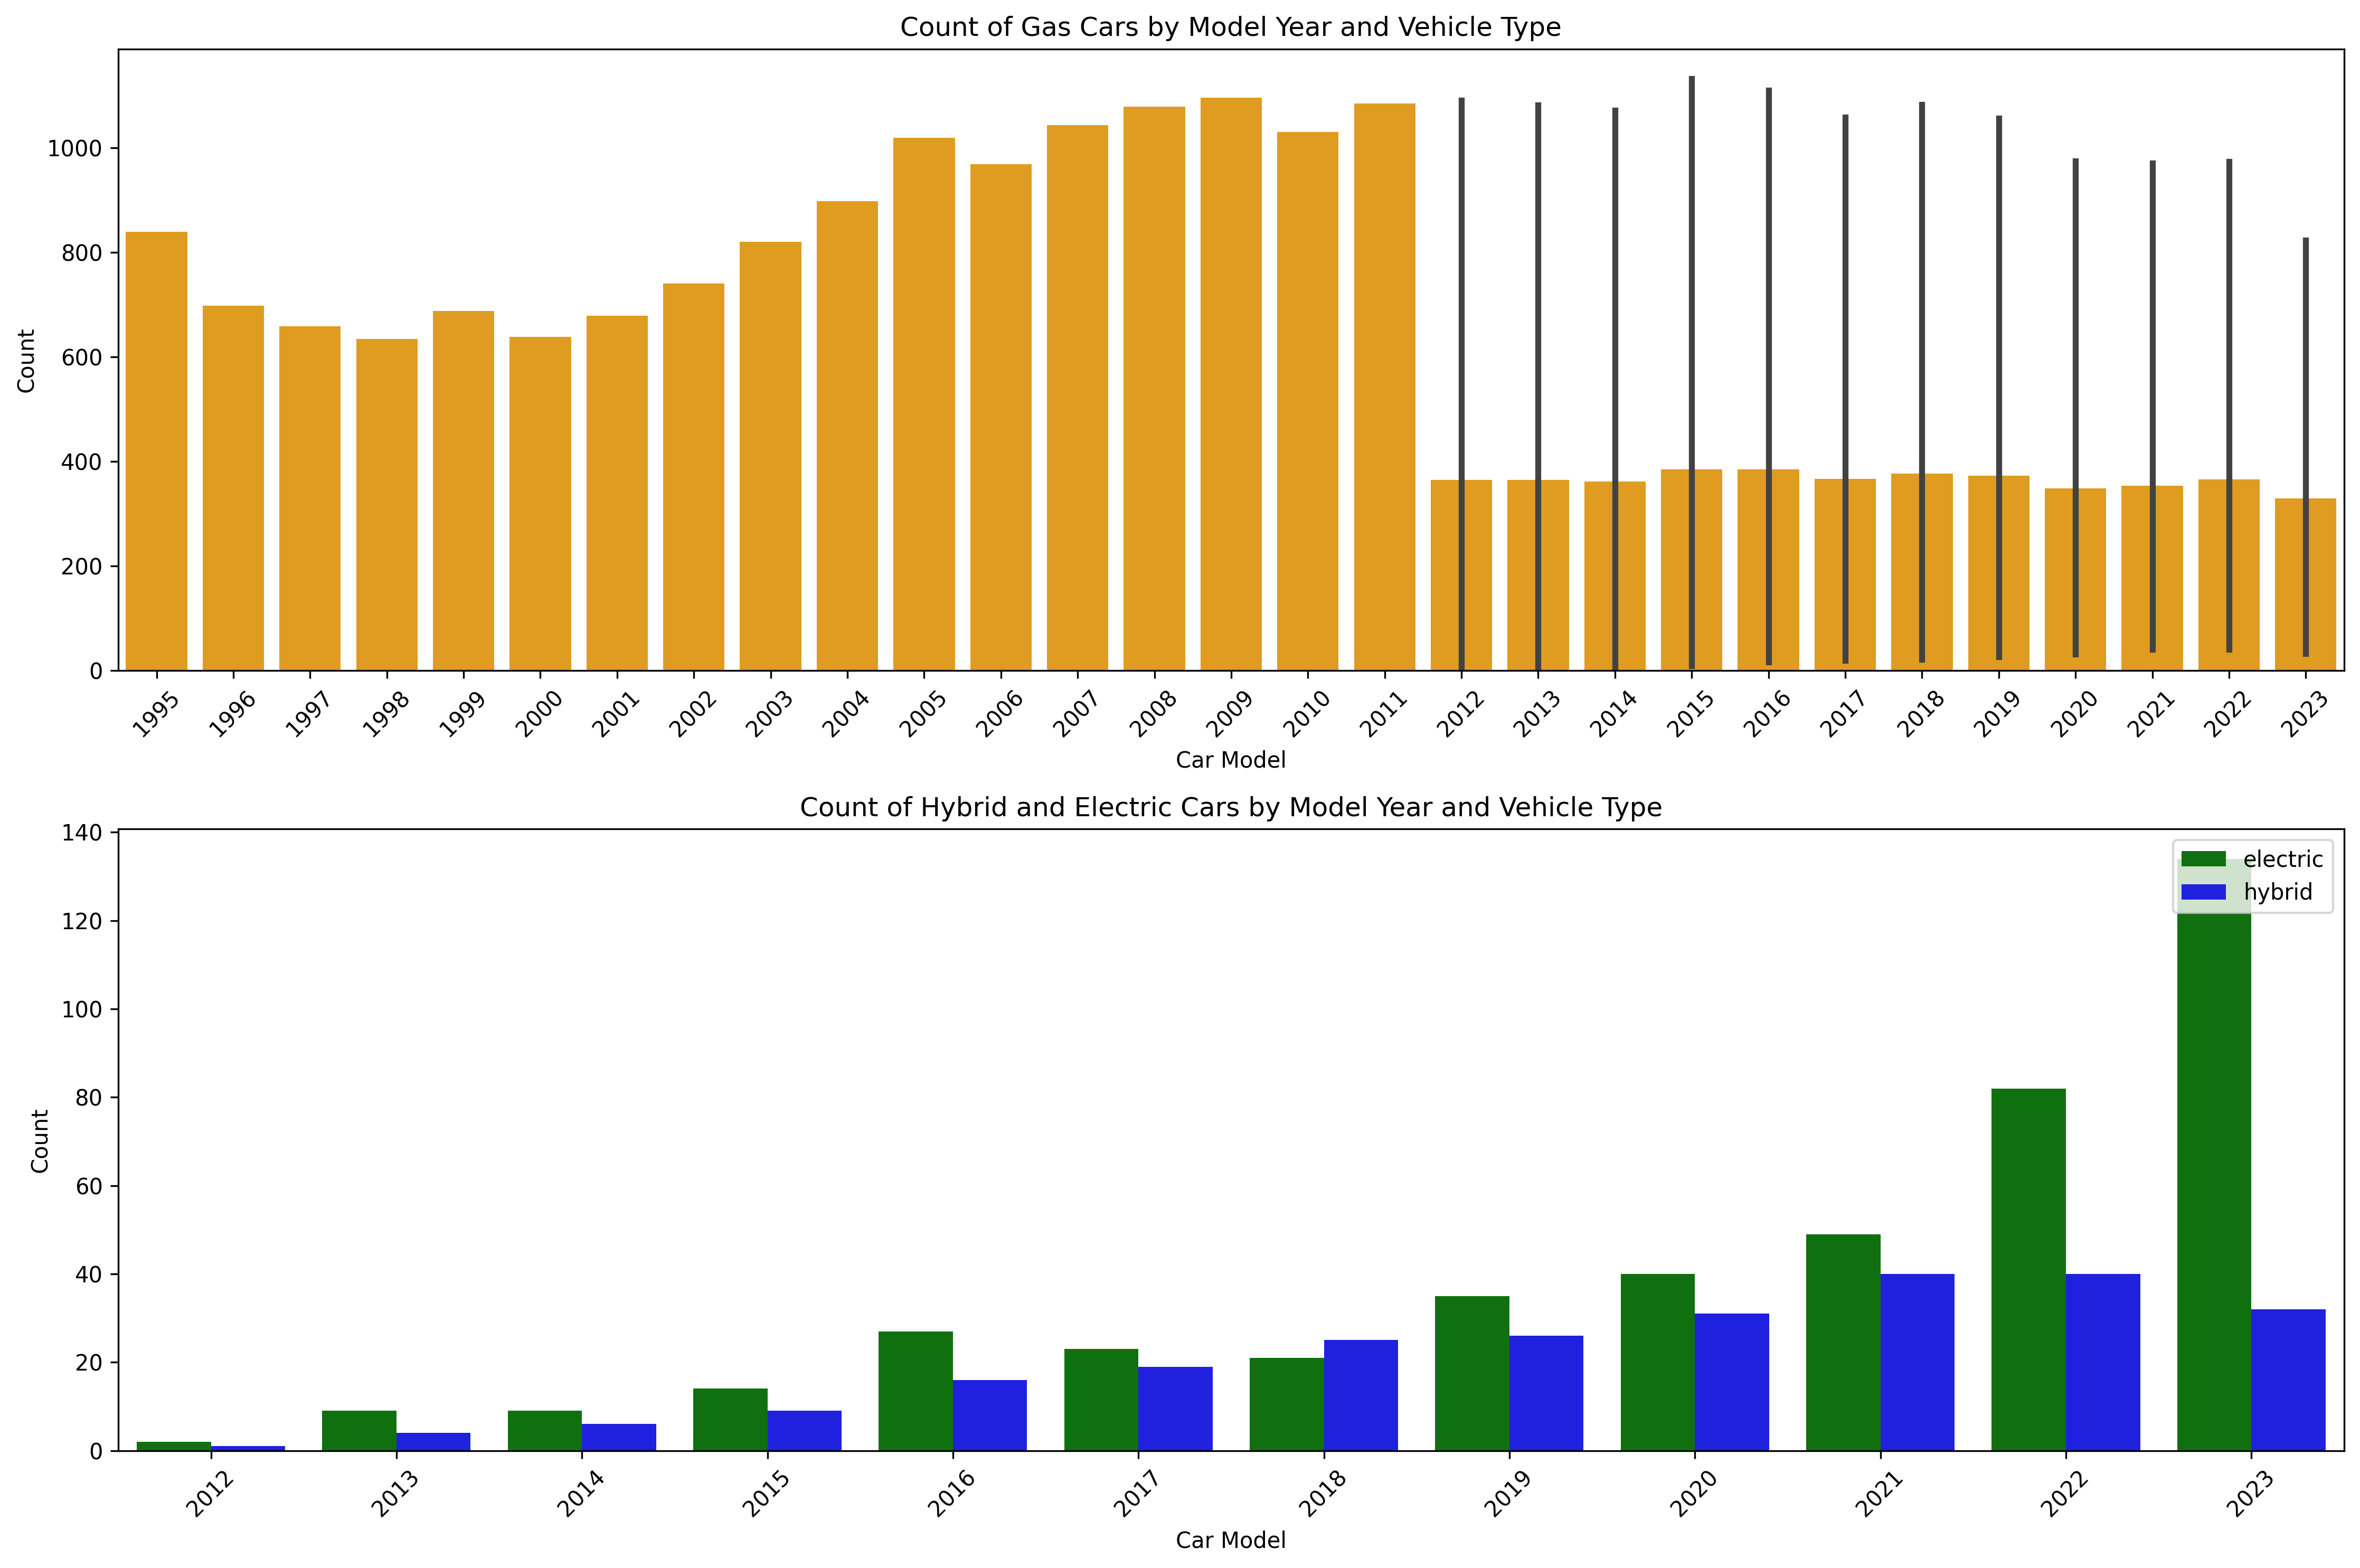

In [44]:
fig, axes = plt.subplots(2, 1, figsize=(15, 10), dpi=300)

sns.barplot(data=fuel_count, x="model_year", y="num_vehicles", ax=axes[0], color='orange')
axes[0].set_xlabel("Car Model")
axes[0].set_ylabel("Count")
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
axes[0].set_title("Count of Unique Gas Cars by Model Year and Vehicle Type")

sns.barplot(data=hybrid_electric, x="model_year", y="num_vehicles", hue="vehicle_type", ax=axes[1],
            palette={"hybrid": "blue", "electric": "green"})
axes[1].set_xlabel("Car Model")
axes[1].set_ylabel("Count")
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)
axes[1].set_title("Count of Unique Hybrid and Electric Cars by Model Year and Vehicle Type") 
axes[1].legend(bbox_to_anchor=(1, 1), loc='upper right')

plt.tight_layout()

plt.show()

# Query 2

## CTE

In [49]:
%%sql --save query_2_scatter
SELECT range1_km, recharge_time_h, vehicleclass_
FROM electric

Running query in 'duckdb:///../data/database/car_data.duckdb'

range1_km,recharge_time_h,vehicleclass_
100,7.0,subcompact
117,7.0,mid-size
122,4.0,compact
100,7.0,subcompact
117,7.0,mid-size
109,8.0,two-seater
109,8.0,two-seater
224,6.0,full-size
335,10.0,full-size
426,12.0,full-size


save the CTE as a pandas `DataFrame()`:

In [50]:
result = %sql SELECT * FROM query_2_scatter
df = result.DataFrame()

Generating CTE with stored snippets : 'query_2_scatter'

Running query in 'duckdb:///../data/database/car_data.duckdb'

## Viz

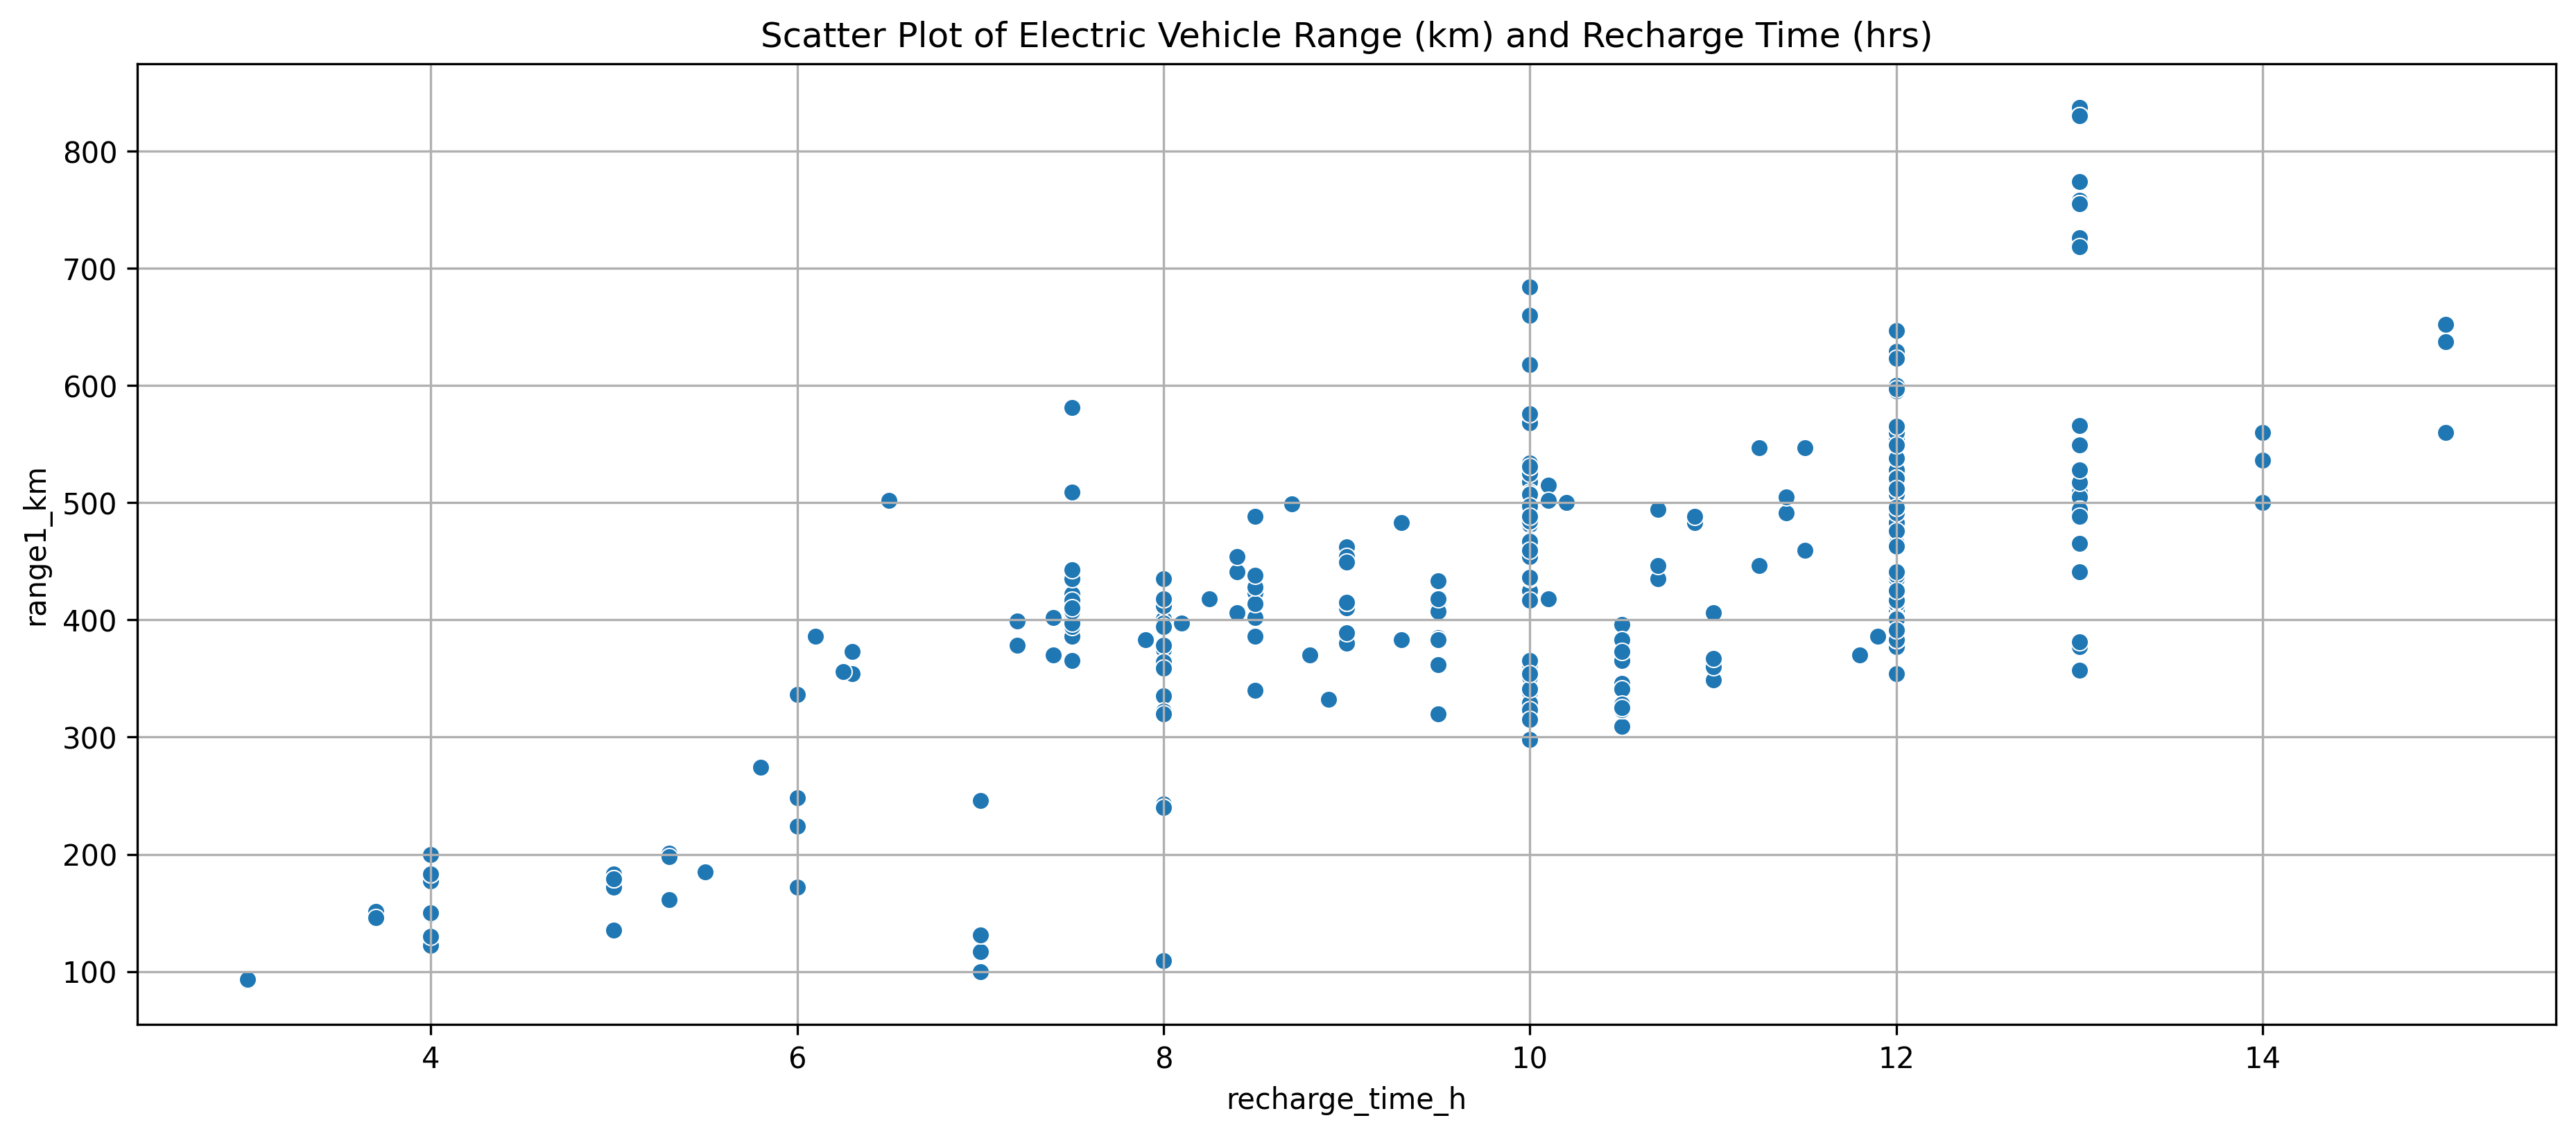

In [36]:
plt.rcParams["figure.dpi"] = 300  # high resolution
plt.figure(figsize=(15, 6))

plt.grid()
scatter_plt = sns.scatterplot(
    data=df, x="recharge_time_h", y="range1_km" #, hue="vehicleclass_" -> messy
)
plt.title("Scatter Plot of Electric Vehicle Range (km) and Recharge Time (hrs)")
plt.show()

# Query 3

## CTE

In [14]:
%%sql --save hybrid_electric_count
SELECT DISTINCT vehicleclass_, vehicle_type, COUNT(id) AS num_vehicles
FROM all_vehicles
WHERE vehicle_type = 'hybrid' OR vehicle_type = 'electric'
GROUP BY vehicleclass_, vehicle_type
ORDER BY num_vehicles DESC;

Running query in 'duckdb:///../data/database/car_data.duckdb'

vehicleclass_,vehicle_type,num_vehicles
full-size,electric,94
mid-size,electric,84
suv - standard,electric,72
suv - small,electric,68
mid-size,hybrid,62
suv - small,hybrid,49
station wagon - small,electric,41
suv - standard,hybrid,37
subcompact,electric,35
compact,hybrid,32


In [15]:
%%sql --save fuel_count
SELECT DISTINCT vehicleclass_, vehicle_type, COUNT(id) AS num_vehicles
FROM fuel
GROUP BY vehicleclass_, vehicle_type
ORDER BY num_vehicles DESC;

Running query in 'duckdb:///../data/database/car_data.duckdb'

vehicleclass_,vehicle_type,num_vehicles
compact,fuel-only,3783
mid-size,fuel-only,3505
suv,fuel-only,3043
pickup truck - standard,fuel-only,2890
subcompact,fuel-only,2595
suv - small,fuel-only,1973
full-size,fuel-only,1724
two-seater,fuel-only,1460
suv - standard,fuel-only,1295
minicompact,fuel-only,1086


Save the CTE as a pandas `DataFrame()`:

In [16]:
hybrid_electric = %sql SELECT * FROM hybrid_electric_count
fuel_count = %sql SELECT * FROM fuel_count

hybrid_electric = hybrid_electric.DataFrame()
fuel_count = fuel_count.DataFrame()

Generating CTE with stored snippets : 'hybrid_electric_count'

Running query in 'duckdb:///../data/database/car_data.duckdb'

Generating CTE with stored snippets : 'fuel_count'

Running query in 'duckdb:///../data/database/car_data.duckdb'

## Viz

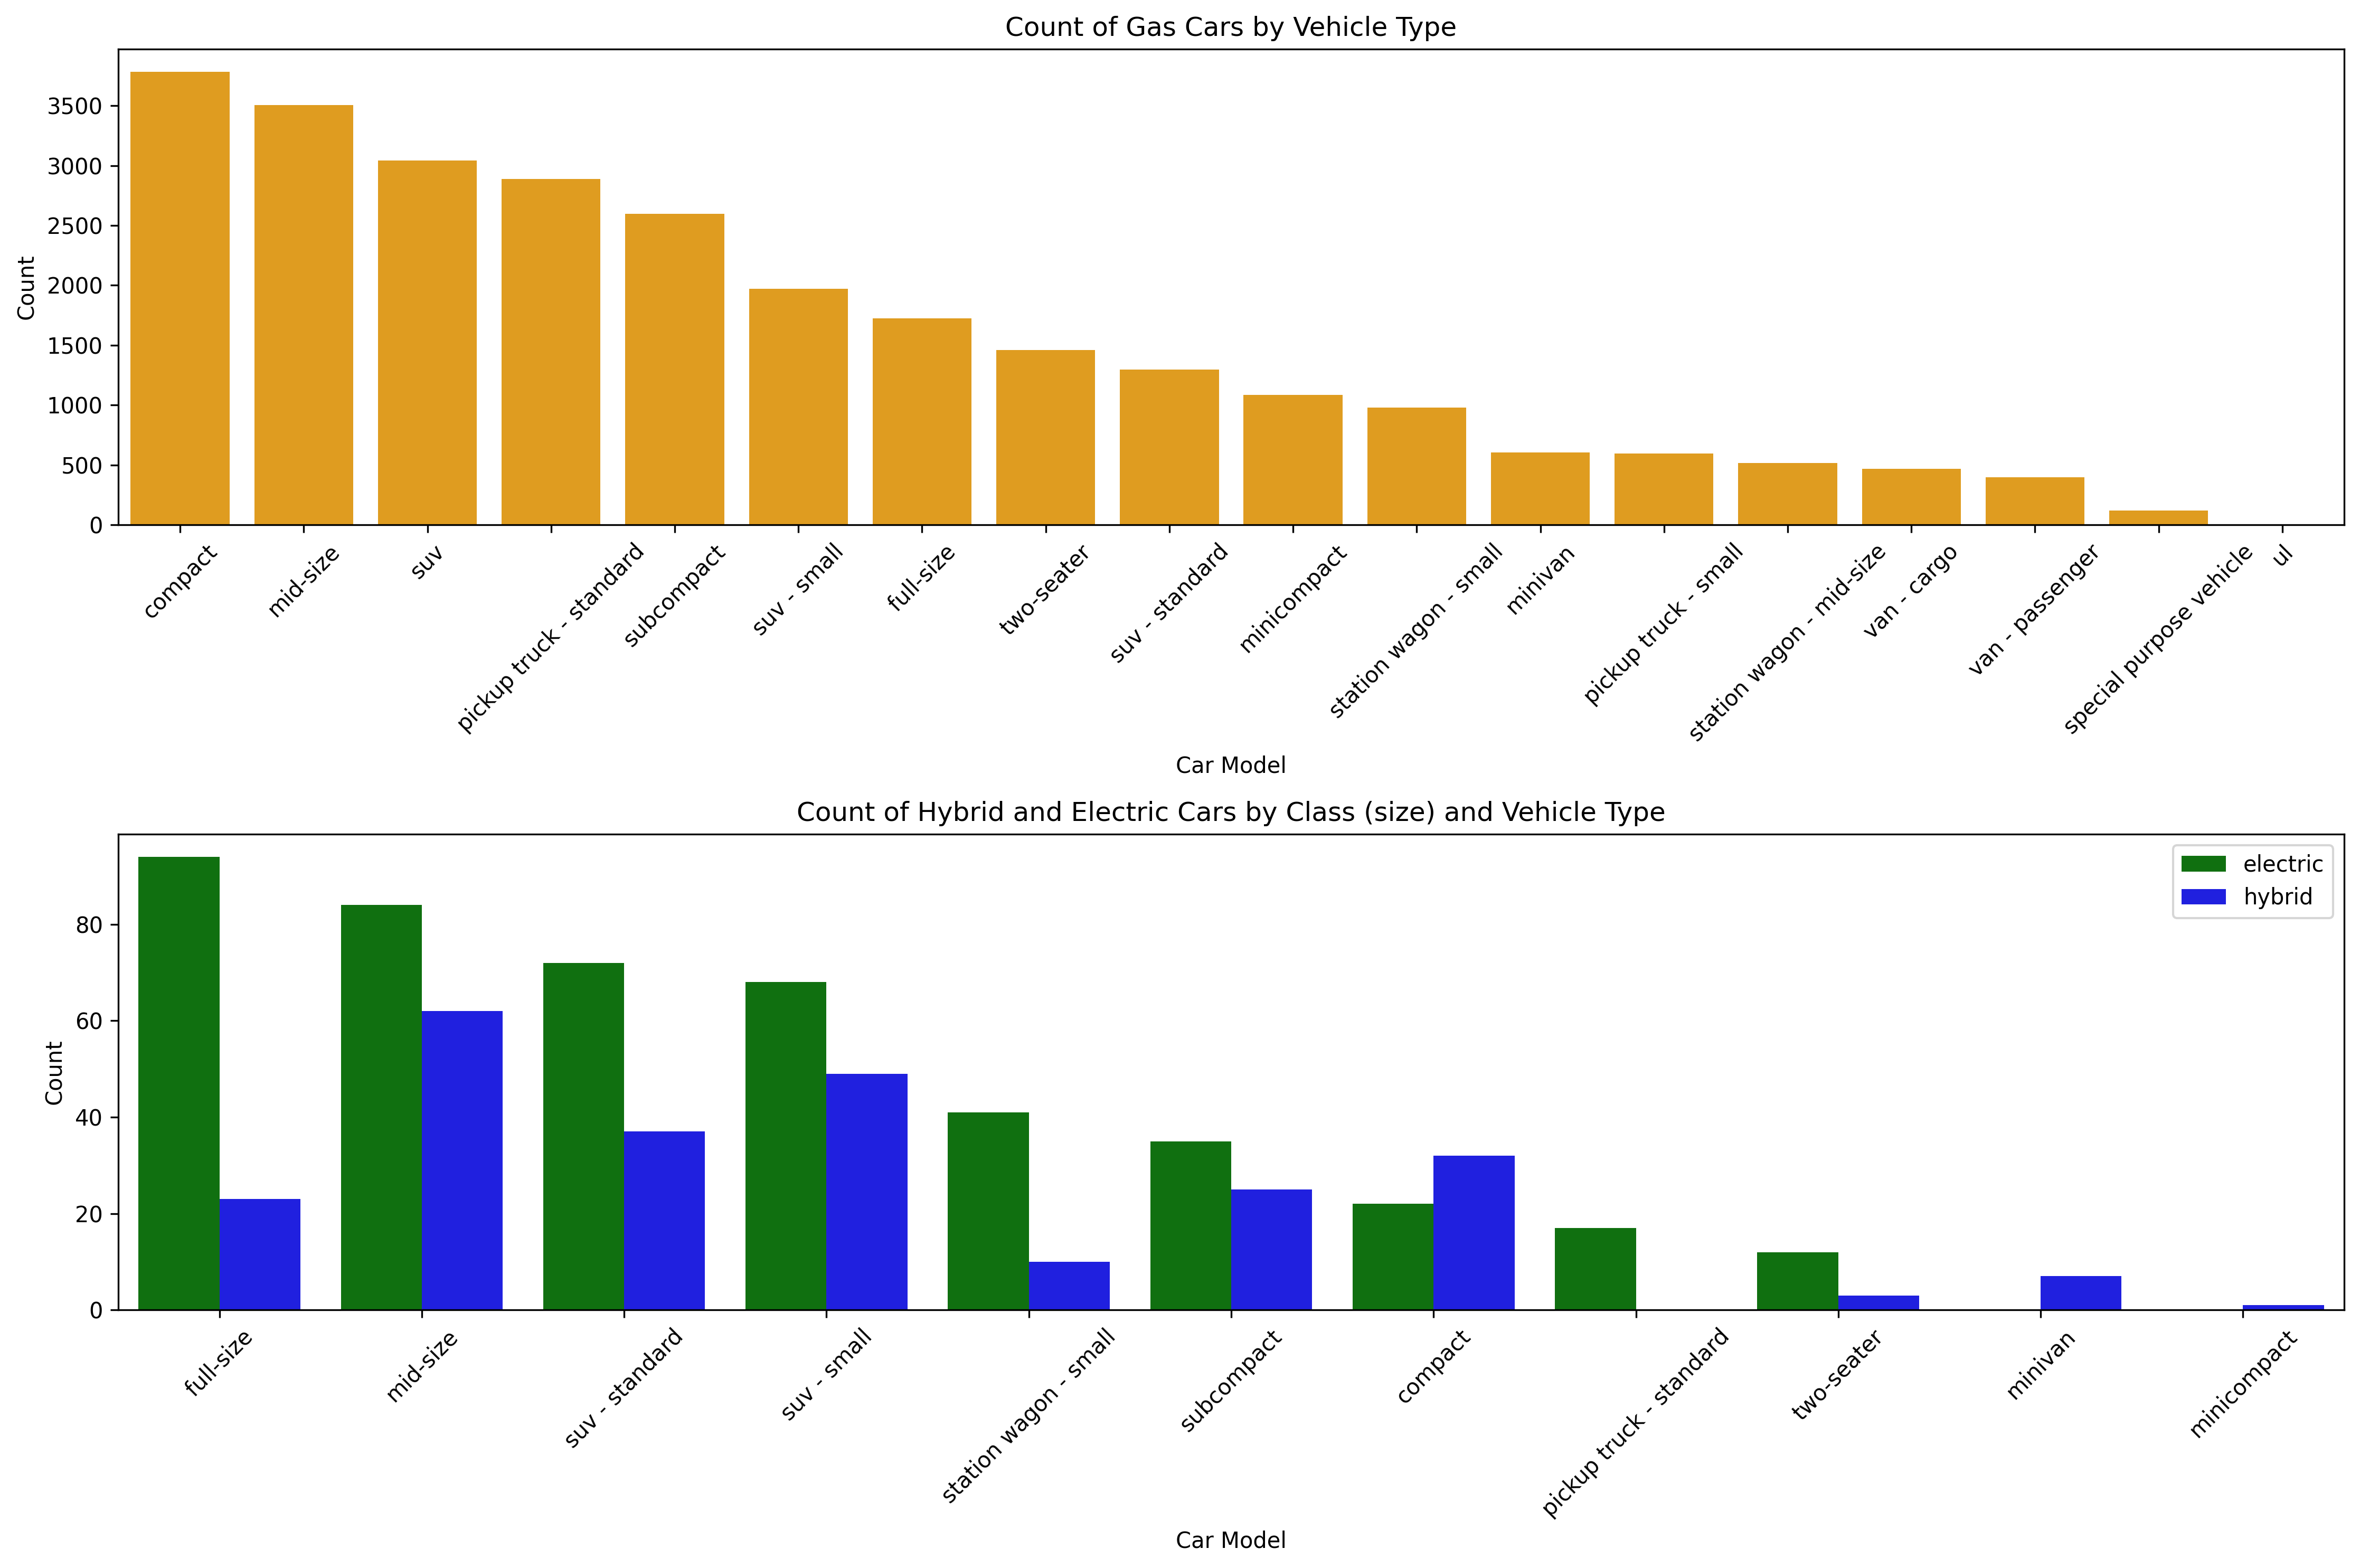

In [17]:
fig, axes = plt.subplots(2, 1, figsize=(15, 10), dpi=300)

sns.barplot(data=fuel_count, x="vehicleclass_", y="num_vehicles", ax=axes[0], color='orange')
axes[0].set_xlabel("Car Model")
axes[0].set_ylabel("Count")
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
axes[0].set_title("Count of Unique Gas Cars by Vehicle Type")

sns.barplot(data=hybrid_electric, x="vehicleclass_", y="num_vehicles", hue="vehicle_type", ax=axes[1],
            palette={"hybrid": "blue", "electric": "green"})
axes[1].set_xlabel("Car Model")
axes[1].set_ylabel("Count")
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)
axes[1].set_title("Count of Unique Hybrid and Electric Cars by Class (size) and Vehicle Type")
axes[1].legend(bbox_to_anchor=(1, 1), loc='upper right')

plt.tight_layout()

plt.show()

# Query 4

## CTE

In [30]:
%%sql --save query_4_scatter
SELECT fuelconsumption_comb_mpg, co2emissions_g_km, enginesize_l
FROM fuel

Running query in 'duckdb:///../data/database/car_data.duckdb'

fuelconsumption_comb_mpg,co2emissions_g_km,enginesize_l
39,167,1.5
38,172,1.5
36,181,1.5
25,263,3.5
23,291,3.0
29,232,2.0
27,242,2.0
29,230,2.0
29,231,2.0
26,256,3.0


In [31]:
result = %sql SELECT * FROM query_4_scatter
df = result.DataFrame()

Generating CTE with stored snippets : 'query_4_scatter'

Running query in 'duckdb:///../data/database/car_data.duckdb'

/Users/Tegveer/miniforge3/envs/sqlcourse/lib/python3.10/site-packages/sql/run.py:736: JupySQLDataFramePerformanceWarning: It looks like you're using DuckDB with SQLAlchemy. For faster conversions, use  a DuckDB native connection. Docs: https://jupysql.ploomber.io/en/latest/integrations/duckdb.html. to suppress this warning, see: https://jupysql.ploomber.io/en/latest/tutorials/duckdb-native-sqlalchemy.html#supress-warnings
  warnings.warn(


## Viz

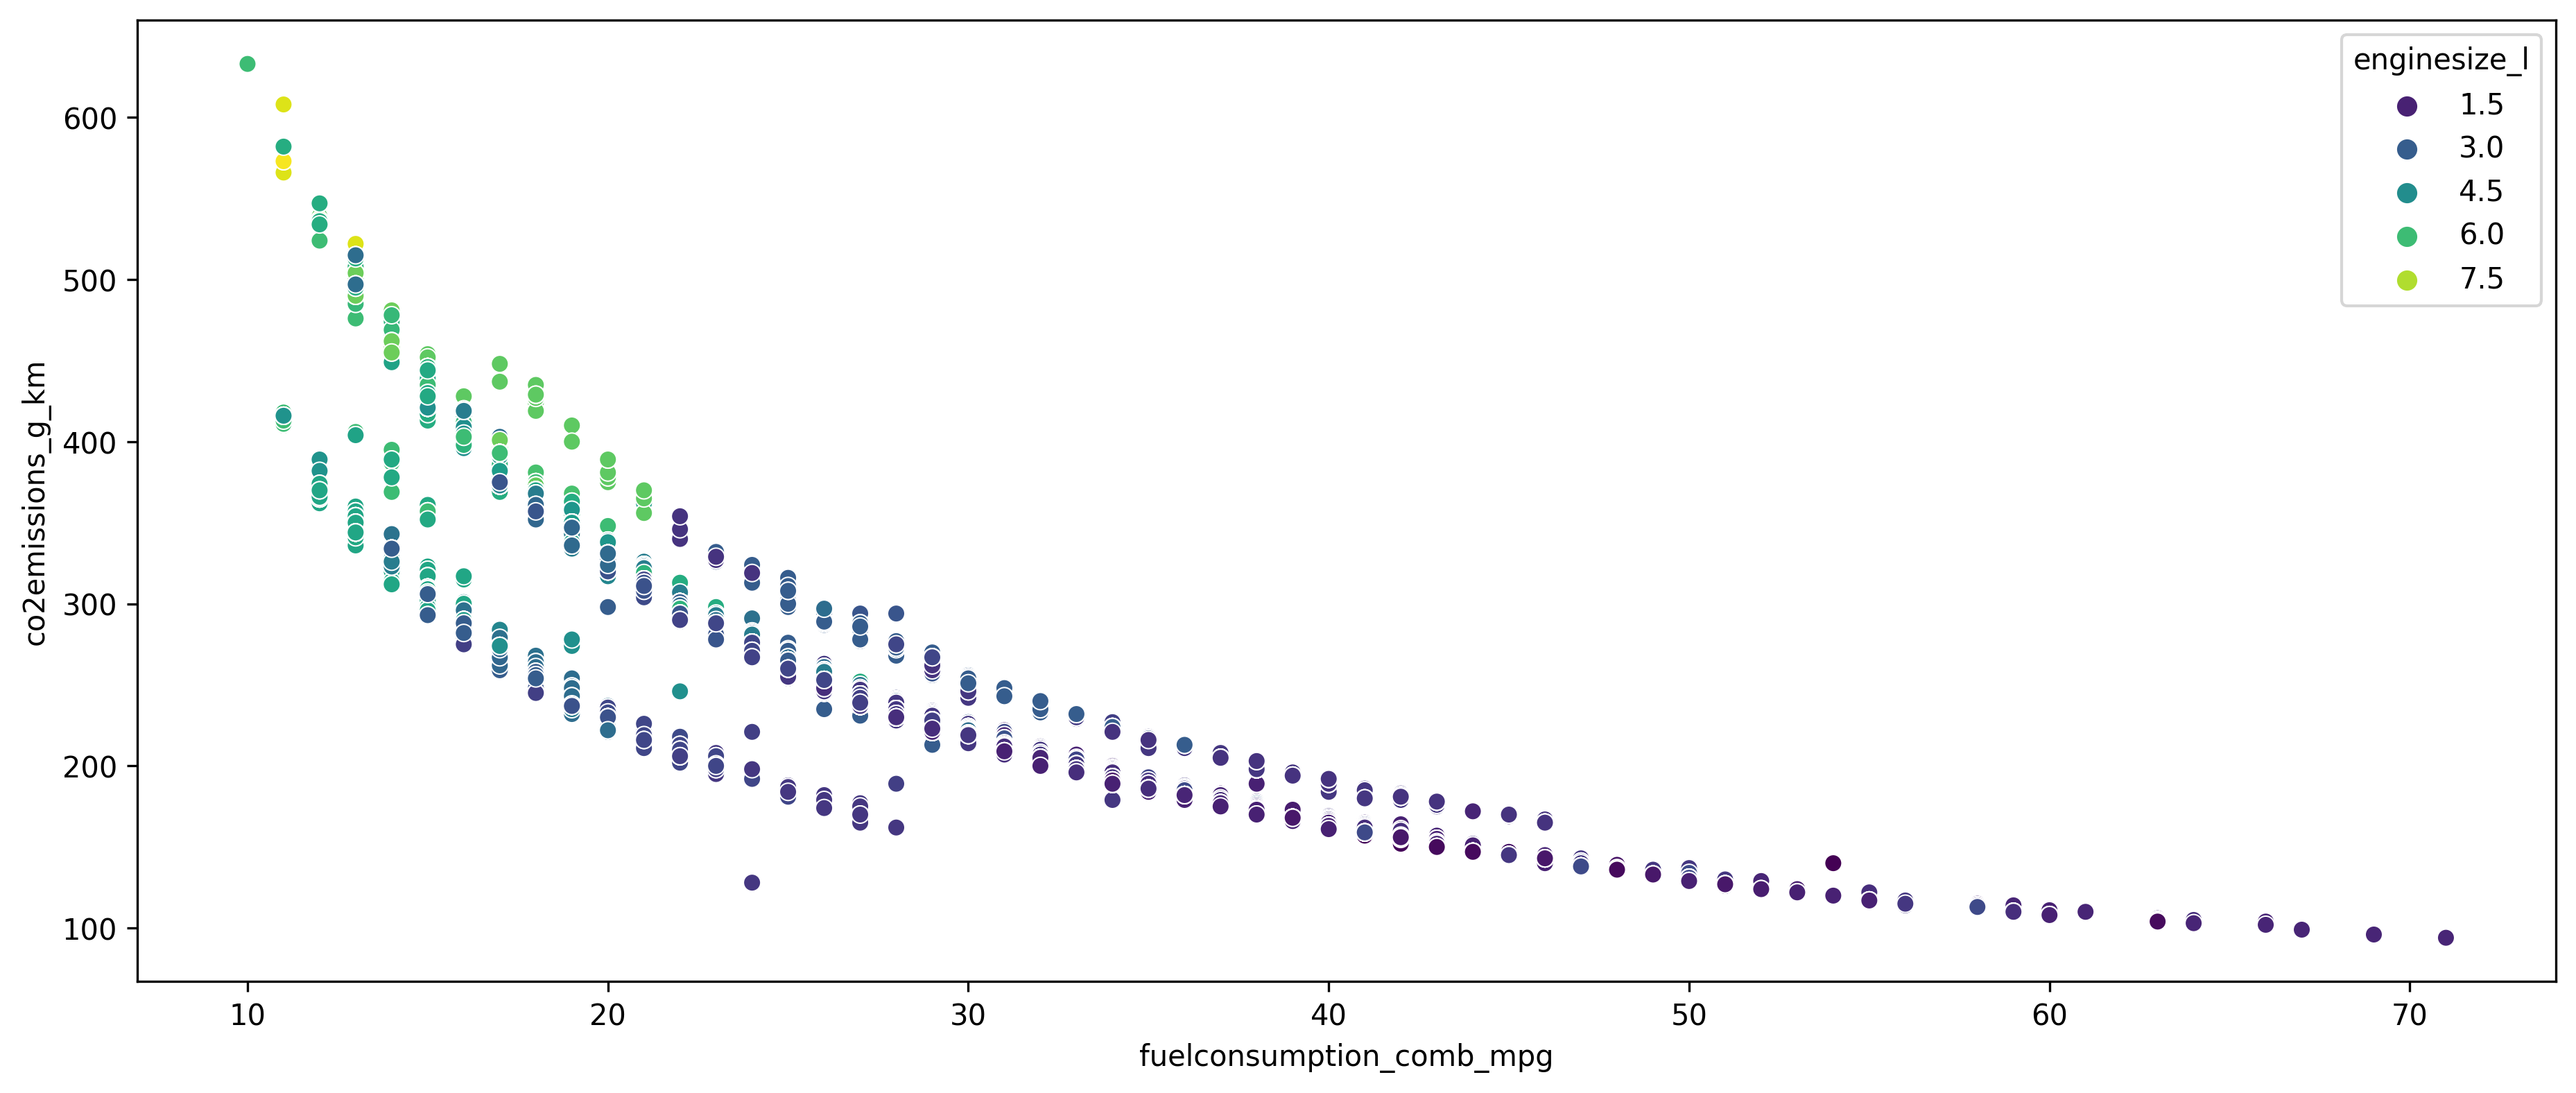

In [32]:
plt.rcParams["figure.dpi"] = 300  # high resolution
plt.figure(figsize=(15, 6))

scatter_plt = sns.scatterplot(
    data=df, x="fuelconsumption_comb_mpg", y="co2emissions_g_km",
    hue="enginesize_l", palette="viridis"
)
plt.title("Fuel Consumption (mpg) vs CO2 Emissions (g/km) by Engine Size (L) for Gas Cars")
plt.show()

# Query 5

## CTE

In [59]:
%sql select * from all_vehicles where vehicle_type = 'electric'

Running query in 'duckdb:///../data/database/car_data.duckdb'

co2_rating,type_of_wheel_drive,fuelconsumption_comb_mpg,number_of_gears,range1_km,range2_km,mapped_fuel_type,fuel_type2,fuel_type,fuel_type1,transmission_type,fuelconsumption_hwy_l_100km,vehicleclass_,make_,consumption_city_kwh_100km,model_year,co2emissions_g_km,cylinders_,transmission_,model,fuelconsumption_hwy_kwh_100km,fuelconsumption_city_l_100km,fuelconsumption_comb_l_100km,vehicle_type,consumption_combinedle_100km,motor_kw,fuelconsumption_comb_kwh_100km,smog_rating,id,hybrid_fuels,recharge_time_h,enginesize_l
None,None,None,1,100,None,electricity,None,B,None,automatic,2.4,subcompact,mitsubishi,16.9,2012,0,None,A1,i-miev,21.4,1.9,2.1,electric,None,49,18.7,None,1,None,7.0,None
None,None,None,1,117,None,electricity,None,B,None,automatic,2.6,mid-size,nissan,19.3,2012,0,None,A1,leaf,23.0,2.2,2.4,electric,None,80,21.1,None,2,None,7.0,None
None,None,None,1,122,None,electricity,None,B,None,automatic,2.4,compact,ford,19.0,2013,0,None,A1,focus electric,21.1,2.1,2.2,electric,None,107,20.0,None,3,None,4.0,None
None,None,None,1,100,None,electricity,None,B,None,automatic,2.4,subcompact,mitsubishi,16.9,2013,0,None,A1,i-miev,21.4,1.9,2.1,electric,None,49,18.7,None,4,None,7.0,None
None,None,None,1,117,None,electricity,None,B,None,automatic,2.6,mid-size,nissan,19.3,2013,0,None,A1,leaf,23.0,2.2,2.4,electric,None,80,21.1,None,5,None,7.0,None
None,None,None,1,109,None,electricity,None,B,None,automatic,2.5,two-seater,smart,17.2,2013,0,None,A1,fortwo electric drive cabriolet,22.5,1.9,2.2,electric,None,35,19.6,None,6,None,8.0,None
None,None,None,1,109,None,electricity,None,B,None,automatic,2.5,two-seater,smart,17.2,2013,0,None,A1,fortwo electric drive coupe,22.5,1.9,2.2,electric,None,35,19.6,None,7,None,8.0,None
None,None,None,1,224,None,electricity,None,B,None,automatic,2.5,full-size,tesla,22.4,2013,0,None,A1,model s (40 kwh),21.9,2.5,2.5,electric,None,225,22.2,None,8,None,6.0,None
None,None,None,1,335,None,electricity,None,B,None,automatic,2.4,full-size,tesla,22.2,2013,0,None,A1,model s (60 kwh),21.7,2.5,2.5,electric,None,225,21.9,None,9,None,10.0,None
None,None,None,1,426,None,electricity,None,B,None,automatic,2.6,full-size,tesla,23.8,2013,0,None,A1,model s (85 kwh),23.2,2.7,2.6,electric,None,270,23.6,None,10,None,12.0,None


In [60]:
%sql select distinct(mapped_fuel_type) from all_vehicles

Running query in 'duckdb:///../data/database/car_data.duckdb'

mapped_fuel_type
premium gasoline
regular gasoline
diesel
ethanol (E85)
natural gas
electricity


In [61]:
%%sql --save query_5_box
SELECT vehicle_type, fuelconsumption_city_l_100km	
FROM all_vehicles
WHERE fuelconsumption_city_l_100km is not null 

Running query in 'duckdb:///../data/database/car_data.duckdb'

vehicle_type,fuelconsumption_city_l_100km
fuel-only,7.9
fuel-only,8.1
fuel-only,8.9
fuel-only,12.6
fuel-only,13.8
fuel-only,11.0
fuel-only,11.3
fuel-only,11.2
fuel-only,11.3
fuel-only,12.3


In [62]:
result = %sql SELECT * FROM query_5_box
df = result.DataFrame()

Generating CTE with stored snippets : 'query_5_box'

Running query in 'duckdb:///../data/database/car_data.duckdb'

/Users/Tegveer/miniforge3/envs/sqlcourse/lib/python3.10/site-packages/sql/run.py:736: JupySQLDataFramePerformanceWarning: It looks like you're using DuckDB with SQLAlchemy. For faster conversions, use  a DuckDB native connection. Docs: https://jupysql.ploomber.io/en/latest/integrations/duckdb.html. to suppress this warning, see: https://jupysql.ploomber.io/en/latest/tutorials/duckdb-native-sqlalchemy.html#supress-warnings
  warnings.warn(


# Viz

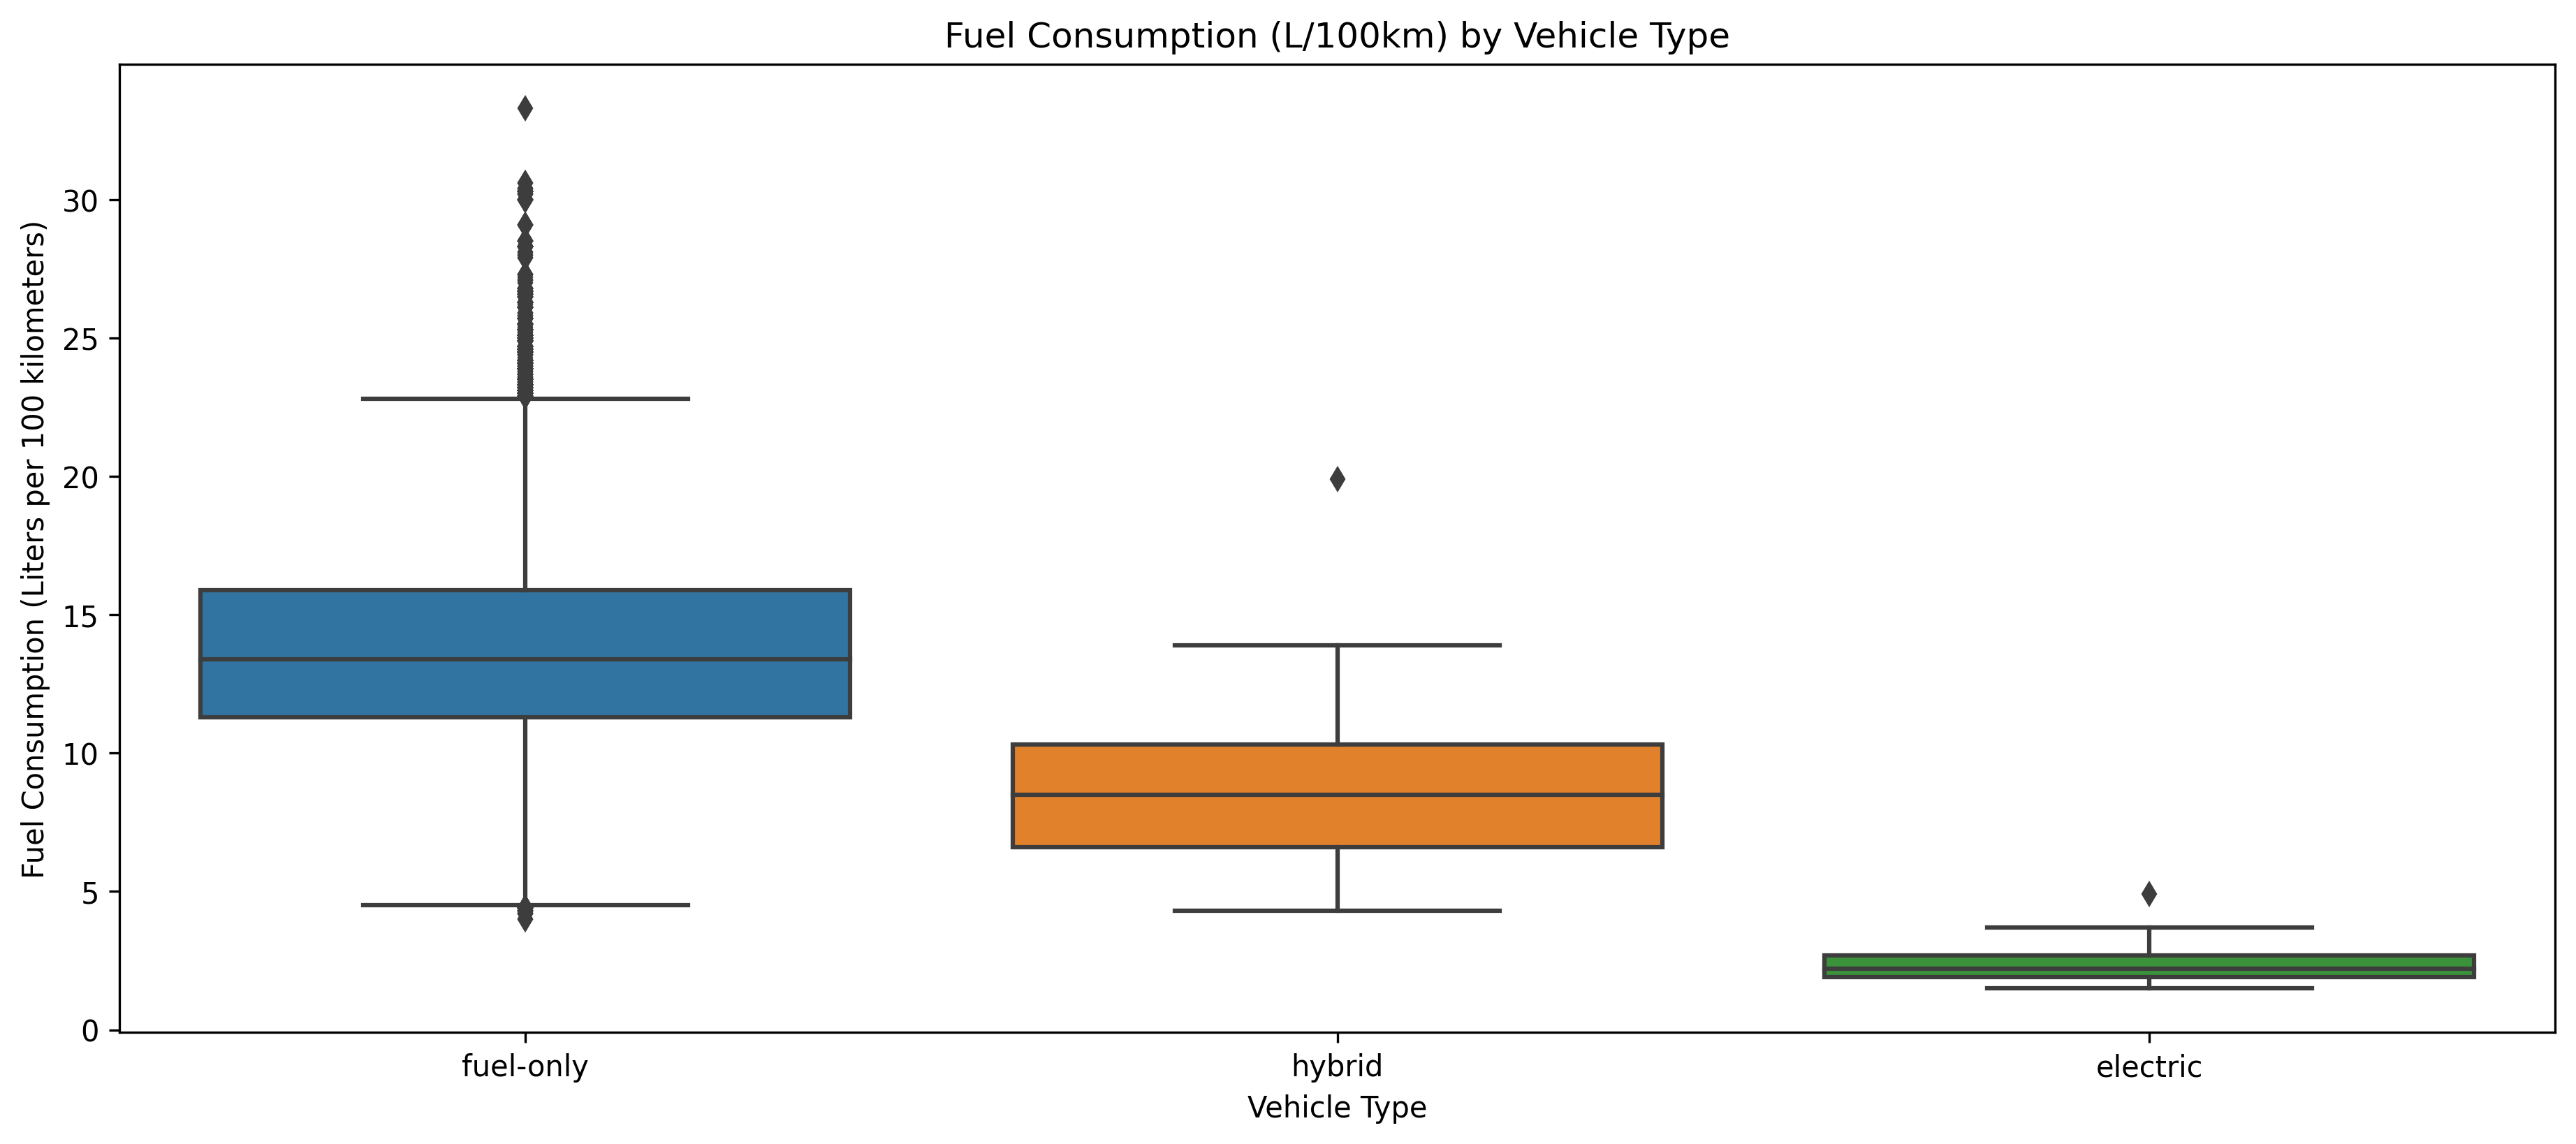

In [63]:
# Create a boxplot using Seaborn
plt.figure(figsize=(15, 6), dpi=300)
sns.boxplot(data=df, x='vehicle_type', y='fuelconsumption_city_l_100km')
plt.xlabel('Vehicle Type')
plt.ylabel('Fuel Consumption (Liters per 100 kilometers)')
plt.title('Fuel Consumption (L/100km) by Vehicle Type')
plt.show()

# Query 6

## CTE

In [70]:
%%sql --save query_6_heatmap
SELECT corr(fuelconsumption_comb_l_100km, enginesize_l) AS corr
FROM fuel

Running query in 'duckdb:///../data/database/car_data.duckdb'

corr
0.8067804627881944


In [71]:
tmp = %sql SELECT * FROM fuel
df = tmp.DataFrame()
df = df.select_dtypes(exclude=[object])
df = df[['fuelconsumption_comb_l_100km', 'enginesize_l', 'cylinders_', 'co2emissions_g_km', 'co2_rating', 'smog_rating', 'number_of_gears']]
df.corr()

Running query in 'duckdb:///../data/database/car_data.duckdb'

/Users/Tegveer/miniforge3/envs/sqlcourse/lib/python3.10/site-packages/sql/run.py:736: JupySQLDataFramePerformanceWarning: It looks like you're using DuckDB with SQLAlchemy. For faster conversions, use  a DuckDB native connection. Docs: https://jupysql.ploomber.io/en/latest/integrations/duckdb.html. to suppress this warning, see: https://jupysql.ploomber.io/en/latest/tutorials/duckdb-native-sqlalchemy.html#supress-warnings
  warnings.warn(


,fuelconsumption_comb_l_100km,enginesize_l,cylinders_,co2emissions_g_km,co2_rating,smog_rating,number_of_gears
fuelconsumption_comb_l_100km,1.000000,0.806780,0.763103,0.933531,-0.896307,-0.427201,-0.184808
enginesize_l,0.806780,1.000000,0.910284,0.824698,-0.769647,-0.409240,0.005296
cylinders_,0.763103,0.910284,1.000000,0.791088,-0.753742,-0.429466,0.059173
co2emissions_g_km,0.933531,0.824698,0.791088,1.000000,-0.944743,-0.455285,-0.163098
co2_rating,-0.896307,-0.769647,-0.753742,-0.944743,1.000000,0.451485,-0.280521
smog_rating,-0.427201,-0.409240,-0.429466,-0.455285,0.451485,1.000000,0.015195
number_of_gears,-0.184808,0.005296,0.059173,-0.163098,-0.280521,0.015195,1.000000


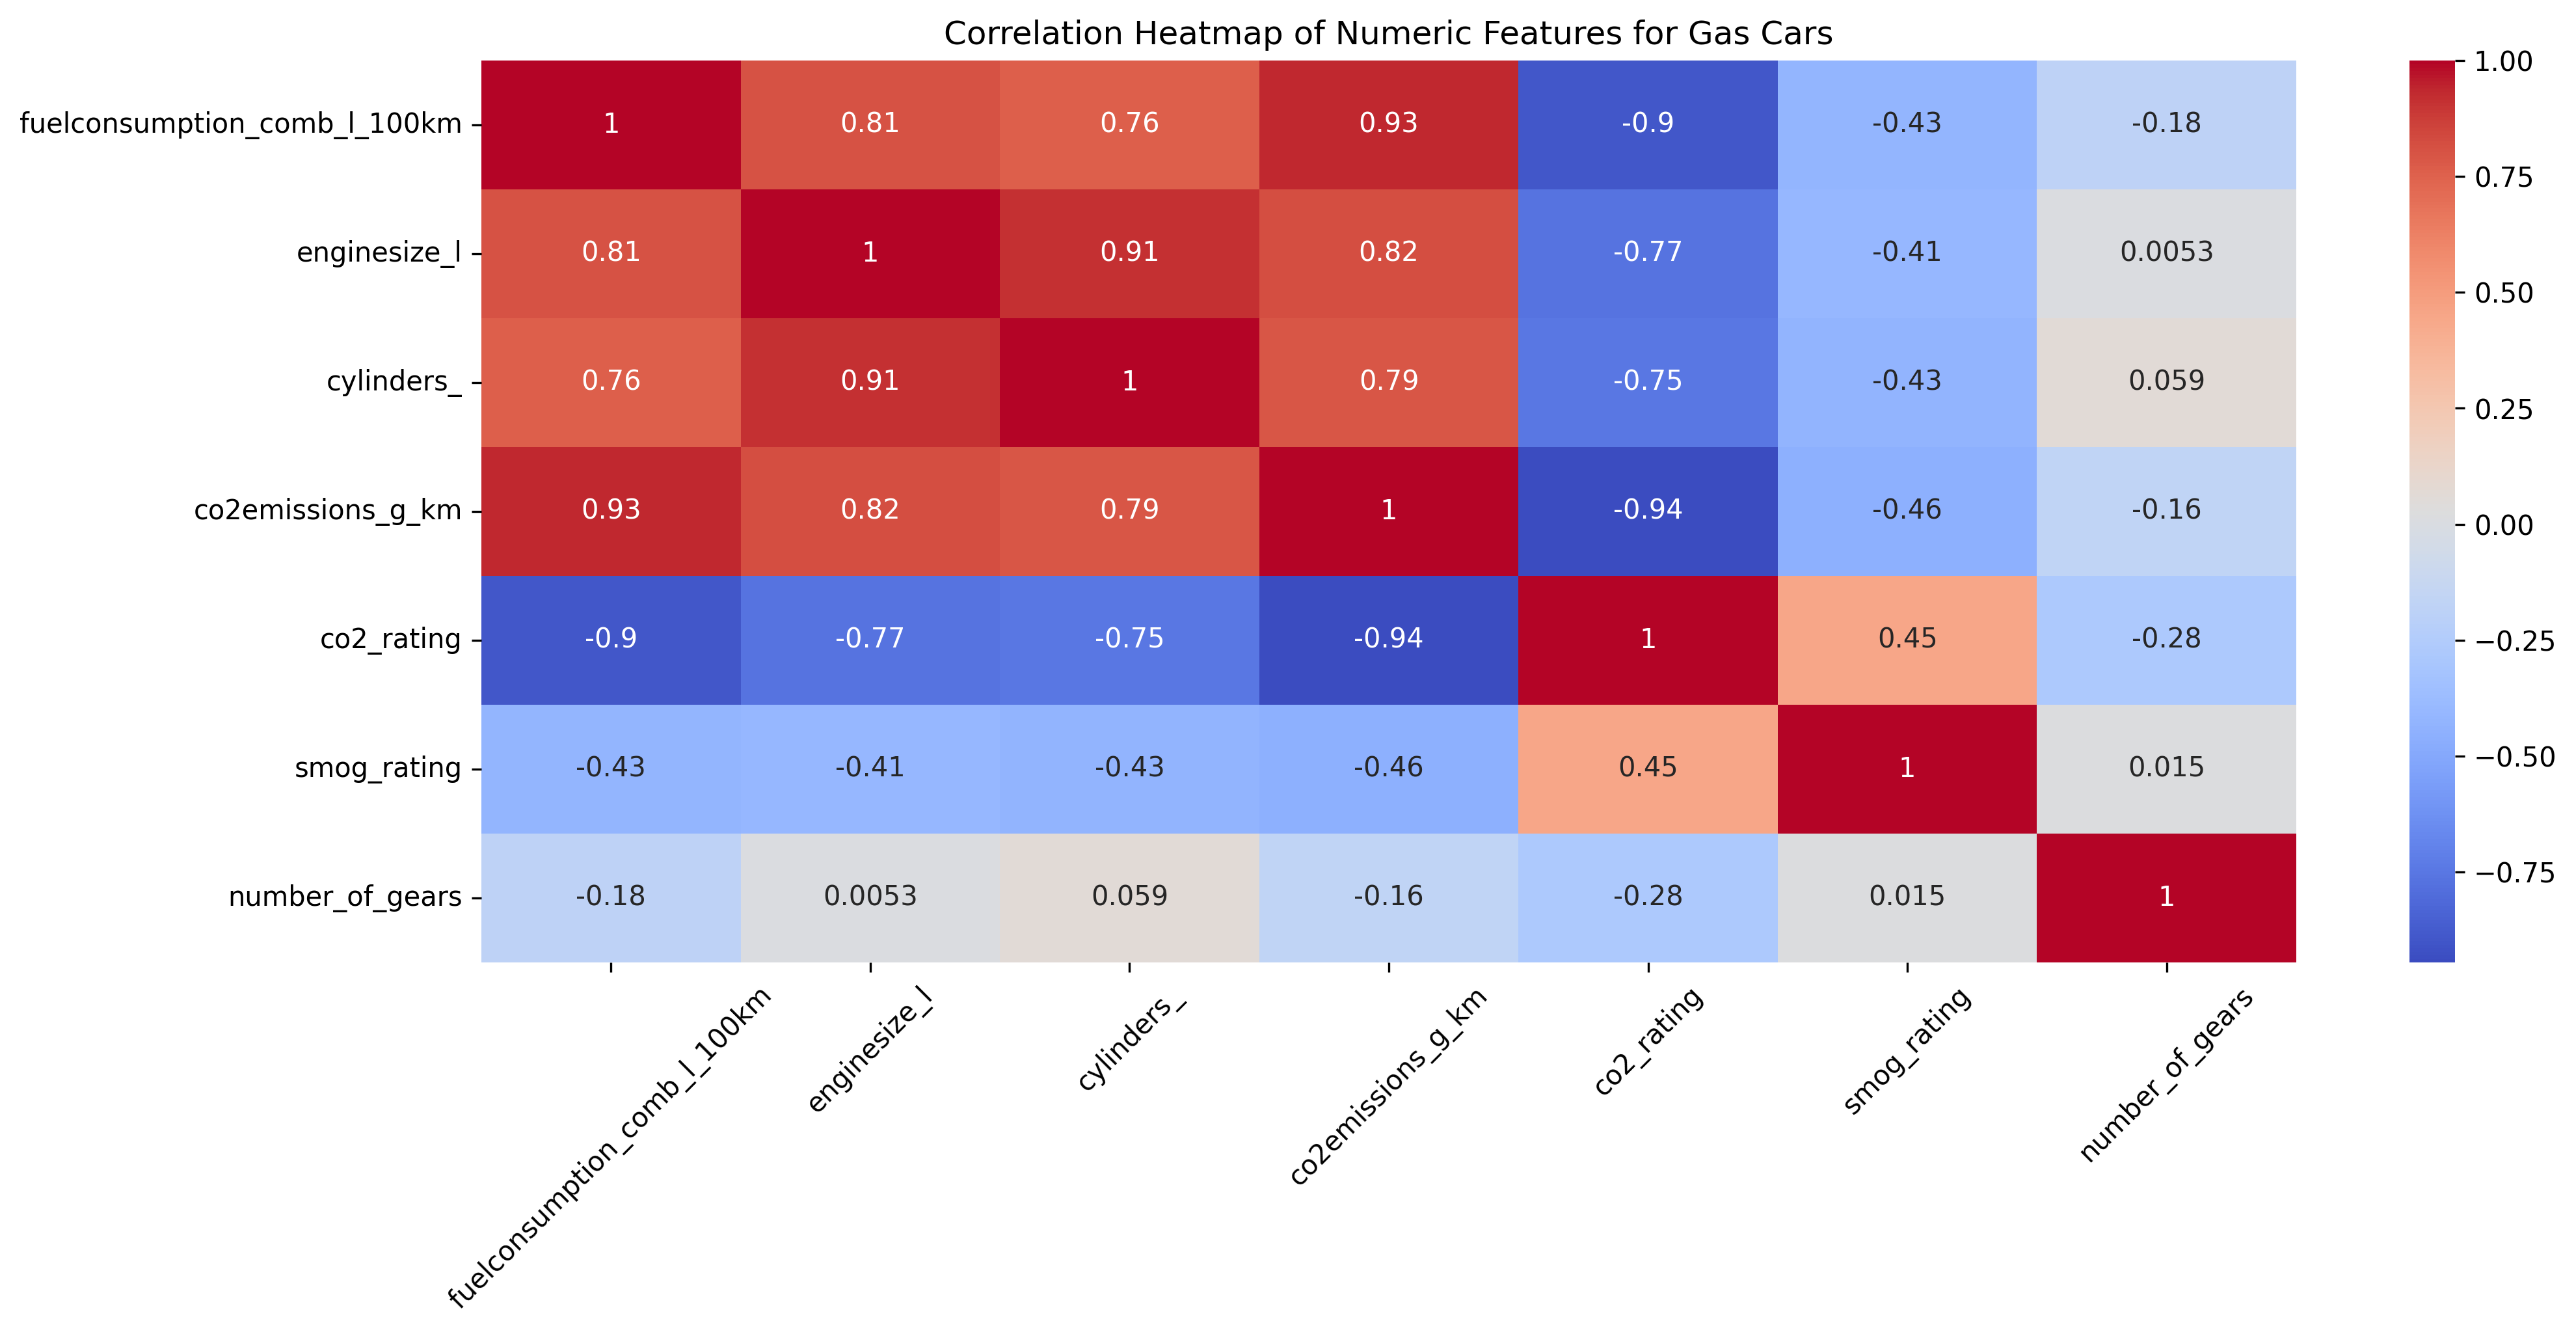

In [73]:
plt.figure(figsize=(15, 6), dpi=300)
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numeric Features for Gas Cars')
plt.xticks(rotation=45)
plt.show()